
# Descriptive Data Analysis and Business Analytics: A Case Study of a Bike Store

**Author:** Hamed Ahmadinia  
**Date:** 6.10.2024

This notebook performs descriptive data analysis and business analytics on a dataset from a global bike store, covering sales from 2013 to 2023. 
The goal of this analysis is to extract insights from the dataset, such as trends in bike sales, customer behavior, and business performance metrics. 
We will perform various steps such as data cleaning, processing, visualization, and analysis to achieve this.


### Step 1: Importing Necessary Libraries
We start by importing the required Python libraries for data analysis and visualization. 
- `numpy` for numerical operations.
- `pandas` for data handling and manipulation.
- `matplotlib` for creating visualizations and plots.

In [2]:
pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


### Step 2: Loading and Preprocessing the Data
In this step, we load the dataset containing the global bike sales data from 2013 to 2023. 
We will perform necessary data preprocessing such as removing missing values, handling data types, and cleaning the dataset to ensure it is ready for analysis.

```python
# Load the dataset
df = pd.read_csv('bike_store_sales.csv')

# Display the first few rows of the dataset to understand its structure
df.head()
```


In [7]:
sales = pd.read_csv('bike_sales_data_world_2013_2023.csv', parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
0,2017-11-26,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,...,4,13.25,2,25,True,40.58,GLS,Standard,Basic,30 Days
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
2,2019-03-23,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,3,8.97,1,0,True,74.54,GLS,Express,Premium,7 Days
3,2015-03-23,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,5,2.56,1,10,False,61.87,DHL,Same Day,NaN,7 Days
4,2018-05-15,15,May,2018,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,5,11.21,1,6,False,19.82,GLS,Same Day,Basic,30 Days


Step 3: Exploring basic descriptive data exploration on Global Bike Sales Dataset (2013-2023)

In [9]:
# Convert the 'Date' column to datetime
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Find the date of the first and most recent order
first_order_date = sales['Date'].min()
most_recent_order_date = sales['Date'].max()

first_order_date, most_recent_order_date

(Timestamp('2013-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

Exploring age of the customer in the dataset

In [11]:
# Finding the youngest and oldest customer based on 'Customer_Age' column
youngest_customer_age = sales['Customer_Age'].min()
oldest_customer_age = sales['Customer_Age'].max()

youngest_customer_age, oldest_customer_age

(17, 87)

Exploring customers genders

In [13]:
# Checking the gender distribution in the dataset to determine whether most customers are male or female
gender_distribution = sales['Customer_Gender'].value_counts()

gender_distribution

Customer_Gender
M    116624
F    109448
Name: count, dtype: int64

Exploring sales and countries

In [17]:
# Checking the country-wise distribution of sales to find the country with the highest and lowest sales
country_sales = sales['Country'].value_counts()

# Getting the country with the highest and lowest sales
most_sales_country = country_sales.idxmax()
least_sales_country = country_sales.idxmin()

most_sales_country, least_sales_country

('United States', 'Spain')

Exploring slaes within diffrent states in the United States

In [22]:
# Filtering data for the United States
us_sales_data = sales[sales['Country'] == 'United States']

# Checking the state-wise distribution of sales in the United States
state_sales_us = us_sales_data['State'].value_counts()

# Getting the state with the highest and lowest sales in the US
most_sales_state_us = state_sales_us.idxmax()
least_sales_state_us = state_sales_us.idxmin()

most_sales_state_us, least_sales_state_us

('California', 'Massachusetts')

Exploring product category sales

In [25]:
# Checking the product category-wise distribution of sales to find the one with the highest sales
product_category_sales = sales['Product_Category'].value_counts()

# Getting the product category with the highest sales
most_sales_product_category = product_category_sales.idxmax()

most_sales_product_category


'Accessories'

In [27]:
# Checking the product-wise distribution of orders to find the product with the highest order quantity
product_sales = sales.groupby('Product')['Order_Quantity'].sum()

# Getting the product with the highest order quantity
most_ordered_product = product_sales.idxmax()

most_ordered_product


'Water Bottle - 30 oz.'

Exploring other product related featurs

In [30]:
# Checking the product with the highest unit cost
highest_unit_cost_product = sales.loc[sales['Unit_Cost'].idxmax(), 'Product']

highest_unit_cost_product

'Road-150 Red, 48'

In [32]:
# Find the product with the highest discount
highest_discount_product = sales.loc[sales['Discount'].idxmax()]

highest_discount_product[['Product_Category', 'Discount']]

Product_Category    Accessories
Discount                     29
Name: 152, dtype: object

Step 4: Basic data visualisation on Global Bike Sales Dataset (2013-2023)

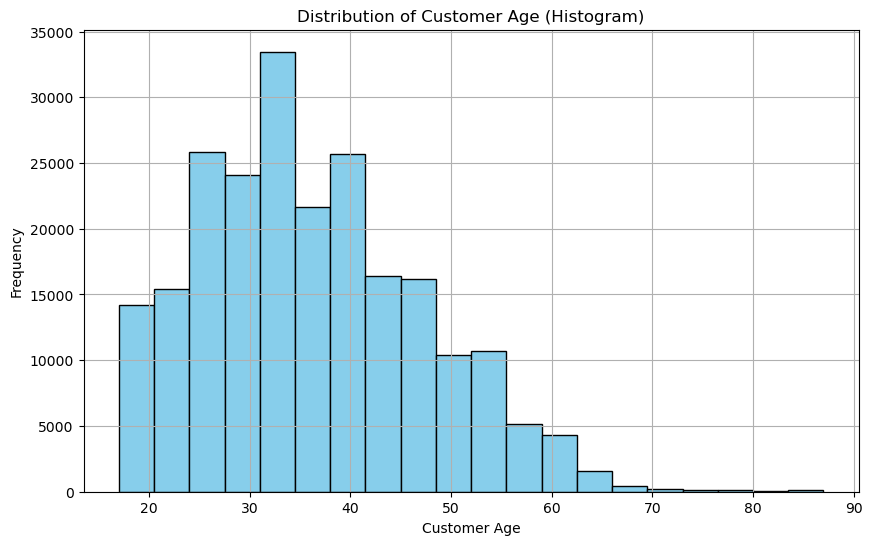

In [35]:
# Histogram to visualize the distribution of customer ages
plt.figure(figsize=(10, 6))
plt.hist(sales['Customer_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age (Histogram)')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

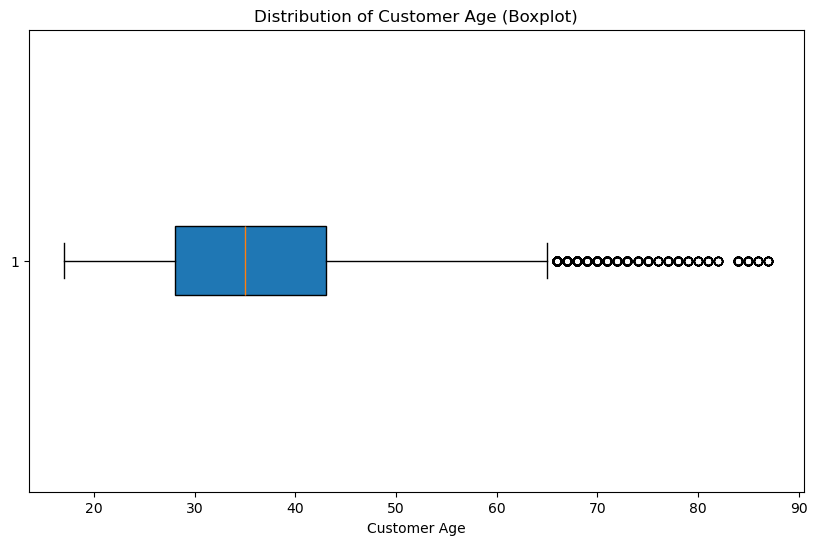

In [36]:
# Boxplot to show the distribution and outliers in customer ages
plt.figure(figsize=(10, 6))
plt.boxplot(sales['Customer_Age'], vert=False, patch_artist=True)
plt.title('Distribution of Customer Age (Boxplot)')
plt.xlabel('Customer Age')
plt.show()

<Axes: ylabel='count'>

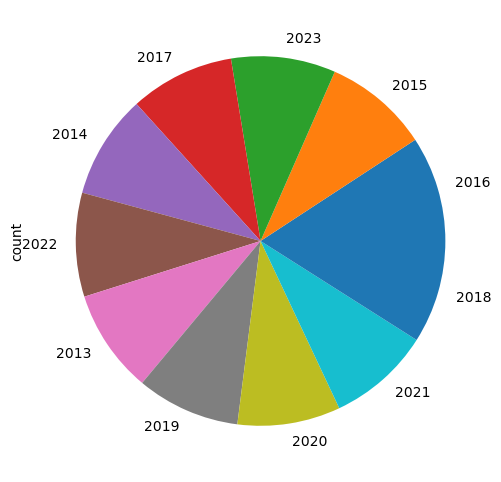

In [39]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

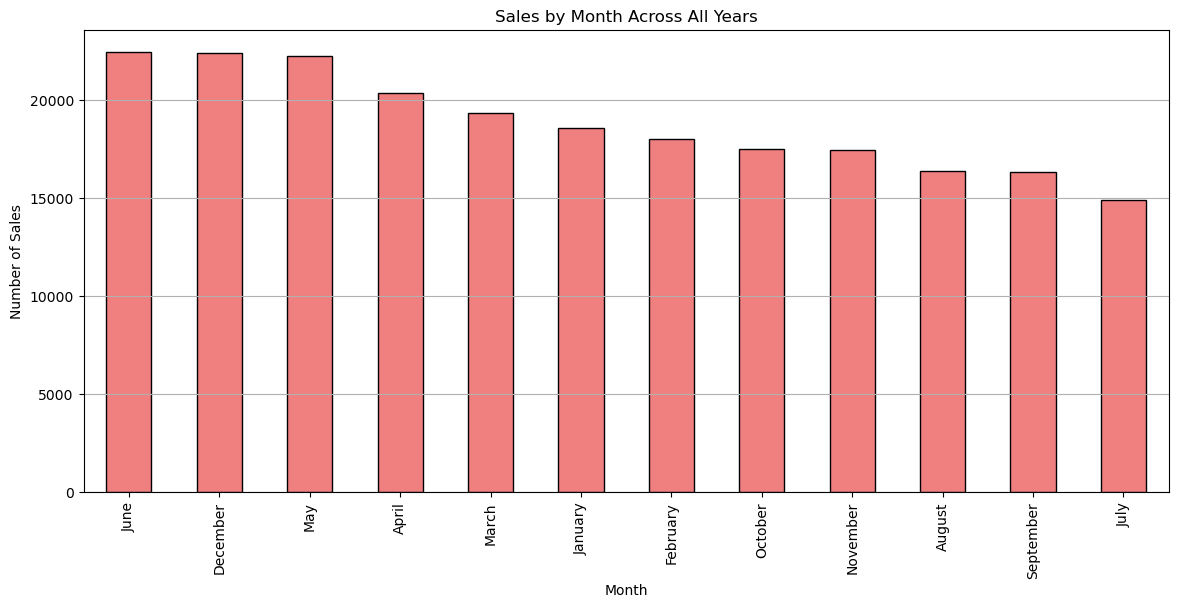

In [41]:
# Count the occurrences of each month across all years
monthly_sales_count = sales['Month'].value_counts()

# Create a bar plot for sales by month
plt.figure(figsize=(14, 6))
monthly_sales_count.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Sales by Month Across All Years')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(axis='y')
plt.show()

Step 4: Basic list creation from Global Bike Sales Dataset (2013-2023)

In [44]:
# Get the unique list of all products from the dataset
unique_products = sales['Product_Category'].unique()

# Display the list of all unique products
unique_products.tolist()

['Accessories', 'Clothing', 'Bikes']

In [46]:
# Get the unique list of products from the dataset
unique_product = sales['Product'].unique()

# Display the list of all unique products
unique_product.tolist()

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 'AWC Logo Cap',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Red',
 'Sport-100 Helmet, Blue',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42

<Axes: xlabel='Product'>

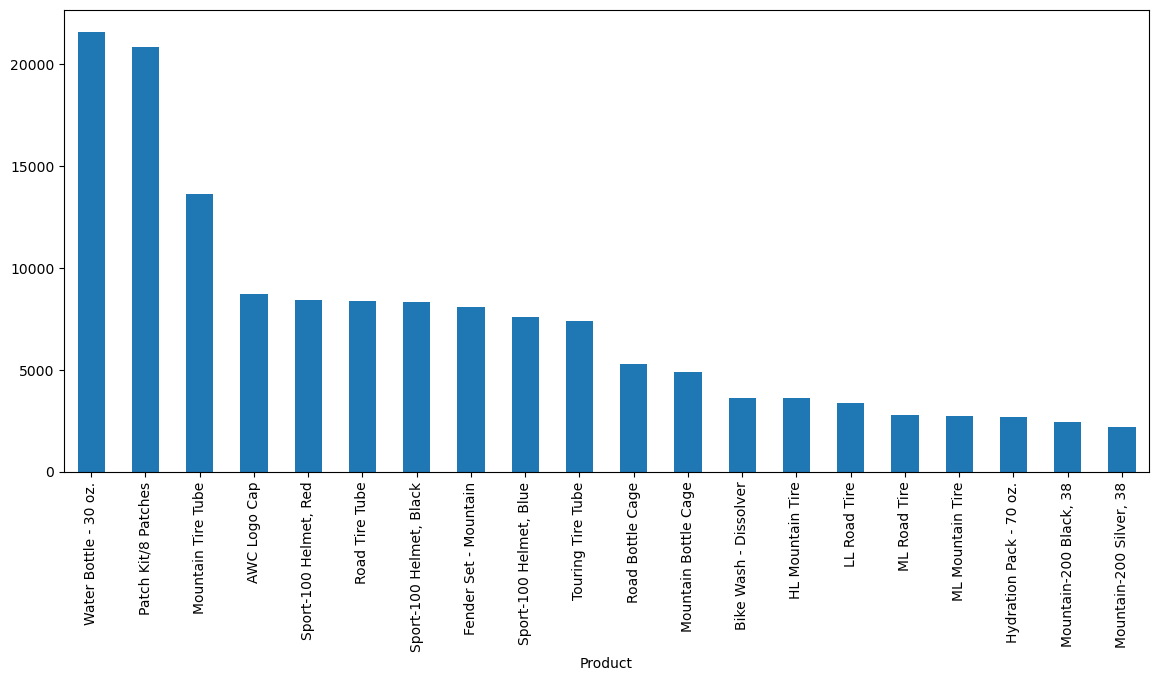

In [48]:
sales['Product'].value_counts().head(20).plot(kind='bar', figsize=(14,6))

Step 5: Basic exploration of relationship among data in Global Bike Sales Dataset (2013-2023)

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

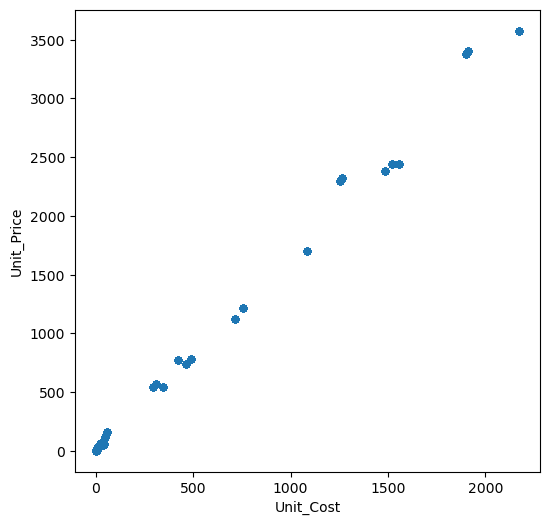

In [51]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

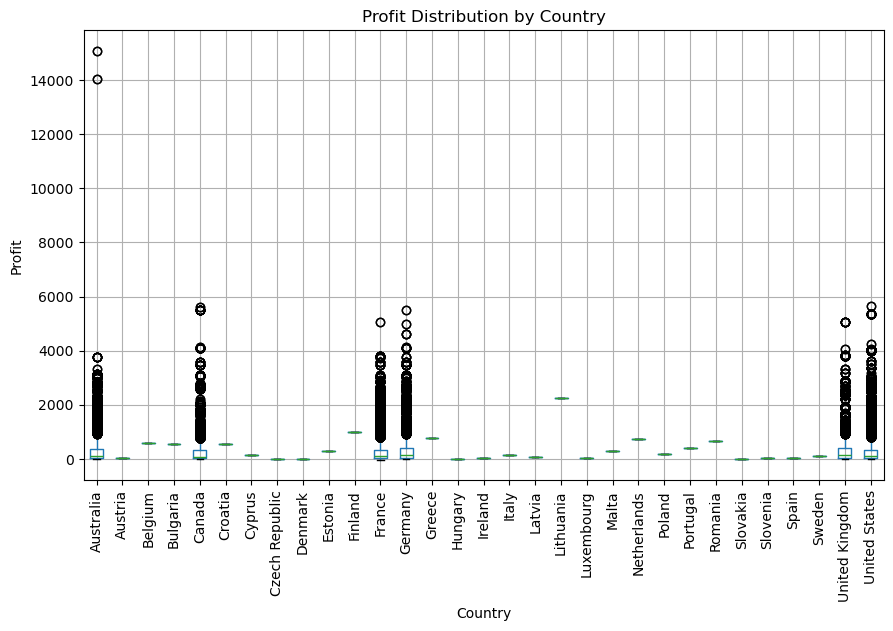

In [52]:
# Creating a boxplot of Profit by Country
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))
plt.title('Profit Distribution by Country')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Country')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

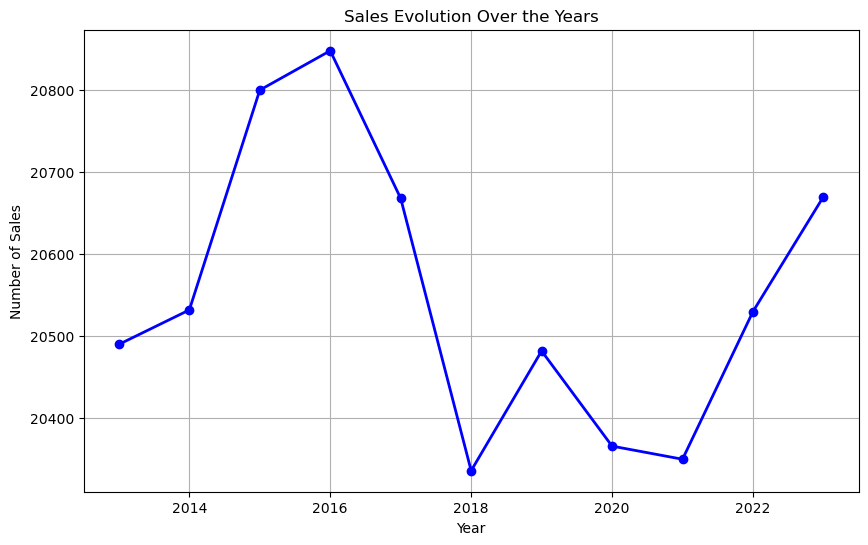

In [53]:
# Grouping the data by year and counting the number of sales for each year
sales_by_year = sales.groupby('Year').size()

# Plotting the sales evolution over the years
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Sales Evolution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

<Axes: xlabel='Unit_Cost', ylabel='Profit'>

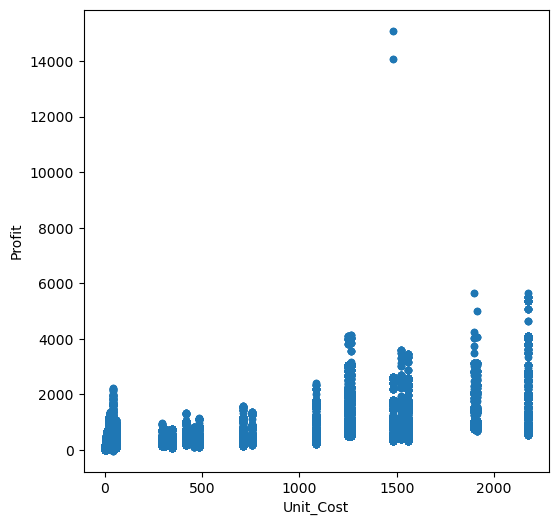

In [55]:
sales.plot(kind='scatter', x='Unit_Cost', y='Profit', figsize=(6,6))

<Axes: ylabel='Density'>

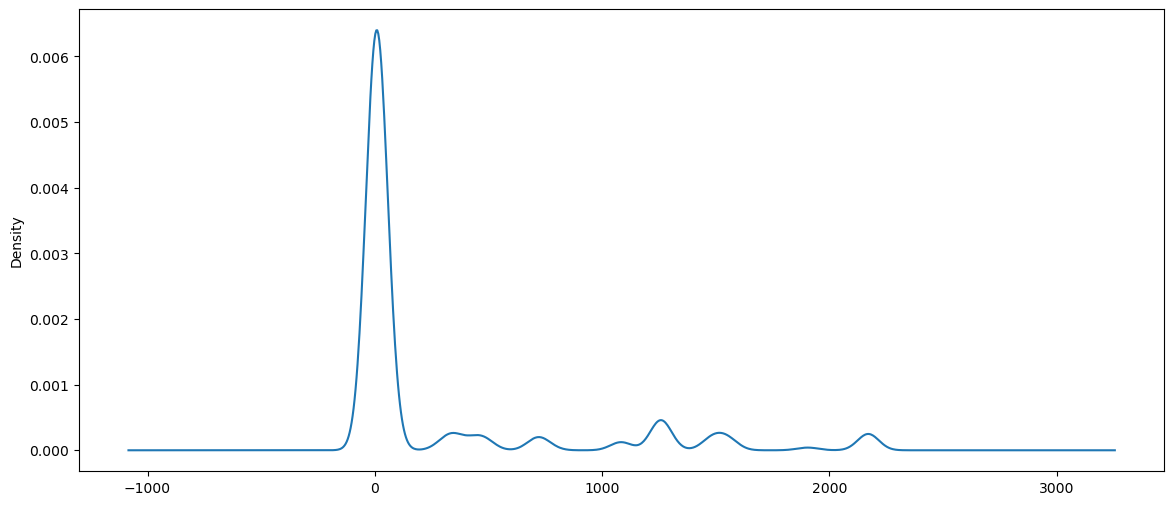

In [56]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

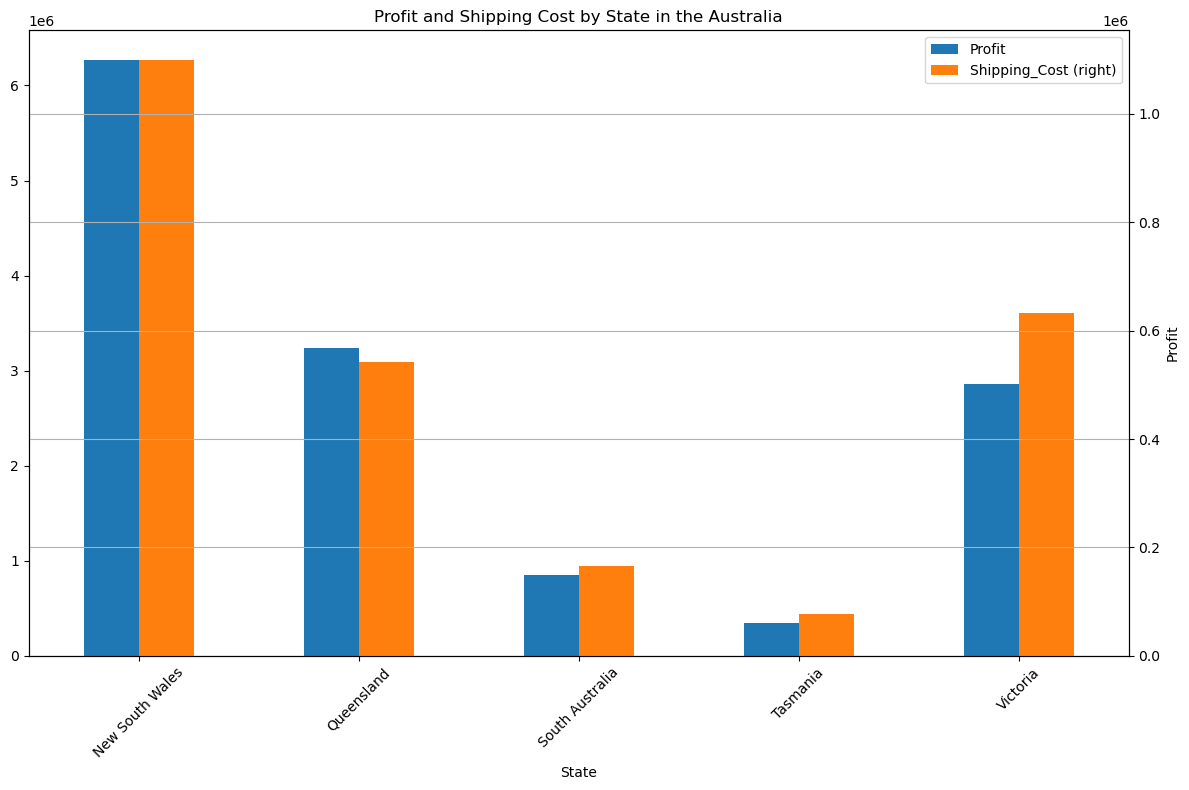

In [59]:
# Filter data for Australia
australia_sales_data = sales[sales['Country'] == 'Australia']

# Group by 'State' and calculate total profit and shipping cost, dropping rows with missing data
profit_and_shipping_by_state = australia_sales_data.groupby('State')[['Profit', 'Shipping_Cost']].sum().dropna()

# Plotting the profit and shipping cost for each state in Australia
profit_and_shipping_by_state.plot(kind='bar', figsize=(12, 8), secondary_y='Shipping_Cost', rot=45)
plt.title('Profit and Shipping Cost by State in the Australia')
plt.xlabel('State')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

Step 6: More exploration of relationship among data in Global Bike Sales Dataset (2013-2023)

In [61]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          111648
Young Adults (25-34)     77308
Youth (<25)              35656
Seniors (64+)             1460
Name: count, dtype: int64

In [62]:
sales.loc[sales['State'] == 'British Columbia']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
0,2017-11-26,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,...,4,13.25,2,25,True,40.58,GLS,Standard,Basic,30 Days
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
14,2020-08-02,2,August,2020,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,4,13.74,7,7,True,22.27,FedEx,Same Day,Basic,60 Days
15,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,2,4.23,2,7,False,22.42,FedEx,Next Day,NaN,7 Days
16,2014-09-02,2,September,2014,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,4,10.97,6,4,True,33.90,GLS,Same Day,NaN,30 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225921,2023-07-05,5,July,2023,38,Adults (35-64),M,Canada,British Columbia,Clothing,...,2,8.34,3,24,False,87.27,UPS,Express,Basic,7 Days
225988,2018-08-18,18,August,2018,31,Young Adults (25-34),F,Canada,British Columbia,Clothing,...,1,6.94,5,7,True,80.10,GLS,Next Day,NaN,60 Days
225989,2020-08-18,18,August,2020,31,Young Adults (25-34),F,Canada,British Columbia,Clothing,...,1,1.08,3,8,True,94.28,GLS,Same Day,NaN,7 Days
225990,2014-09-21,21,September,2014,31,Young Adults (25-34),F,Canada,British Columbia,Clothing,...,4,10.70,1,1,False,22.62,UPS,Standard,NaN,60 Days


In [63]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [65]:
sales.loc[sales['Customer_Gender'] == 'F', 'Revenue'].mean()

766.310923909071

<Figure size 1200x600 with 0 Axes>

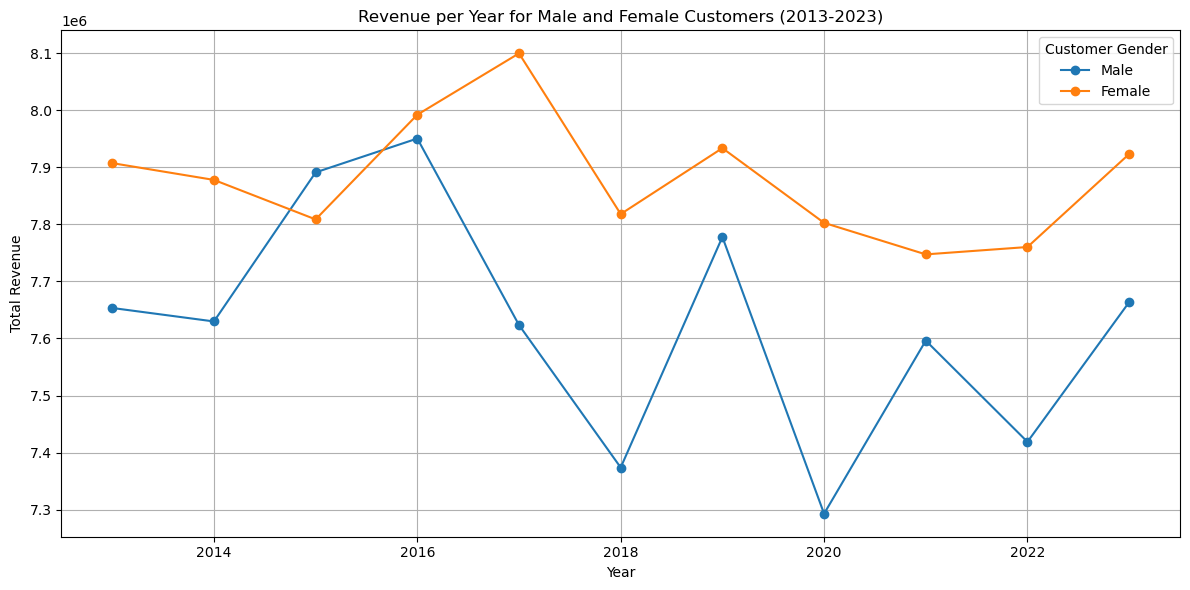

In [66]:
# Grouping the data by Year and Customer_Gender, and summing the Revenue (re-define revenue_by_gender_year)
revenue_by_gender_year = sales.groupby(['Year', 'Customer_Gender'])['Revenue'].sum().unstack()

# Plotting the revenue per year for male and female customers
plt.figure(figsize=(12, 6))
revenue_by_gender_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Revenue per Year for Male and Female Customers (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Customer Gender', labels=['Male', 'Female'])
plt.grid(True)
plt.tight_layout()
plt.show()